In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Import the Manufacturer_Car_data.csv and remove any null values. Plot Curb weight on simple plot.

In [2]:
df = pd.read_csv('Car_sales.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


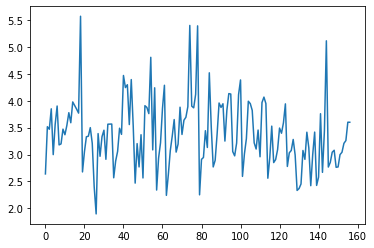

In [3]:
result = df[~df['Curb_weight'].isna()]['Curb_weight']
plt.plot(result)

### 2. Sort the dataset by Curb weight and plot the simple plot again.

In [4]:
result.sort_values()

26     1.895
62     2.240
79     2.250
129    2.332
57     2.339
       ...  
54     4.808
144    5.115
78     5.393
74     5.401
18     5.572
Name: Curb_weight, Length: 155, dtype: float64

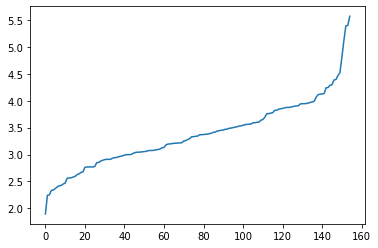

In [5]:
plt.plot(result.sort_values().values)

### 3. Group by the Manufacturer and use barplot to plot fuel efficiency and fuel capacity of each Manufacturer.

In [6]:
df.head(1)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.28015


In [7]:
df.dropna(inplace=True)

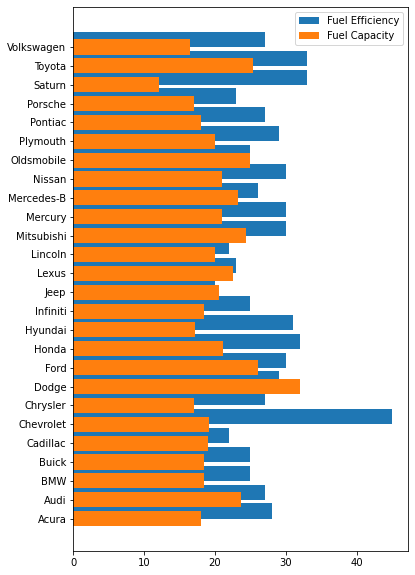

In [8]:
plt.figure(figsize=(6,10))
plt.barh('Manufacturer','Fuel_efficiency',data=df, align='edge')
plt.barh('Manufacturer','Fuel_capacity',data=df, align='center')
plt.legend(['Fuel Efficiency', 'Fuel Capacity'])
plt.show()

In [9]:
fe = df.groupby('Manufacturer')['Fuel_efficiency'].mean()
fe
fc = df.groupby('Manufacturer')['Fuel_capacity'].mean()
fc

Manufacturer
Acura         16.133333
Audi          19.533333
BMW           17.550000
Buick         17.750000
Cadillac      18.500000
Chevrolet     15.287500
Chrysler      16.380000
Dodge         21.711111
Ford          19.650000
Honda         17.080000
Hyundai       14.533333
Infiniti      18.500000
Jeep          19.833333
Lexus         20.266667
Lincoln       19.500000
Mercedes-B    20.450000
Mercury       17.833333
Mitsubishi    18.285714
Nissan        17.720000
Oldsmobile    19.050000
Plymouth      16.166667
Pontiac       16.500000
Porsche       17.000000
Saturn        12.100000
Toyota        17.375000
Volkswagen    14.740000
Name: Fuel_capacity, dtype: float64

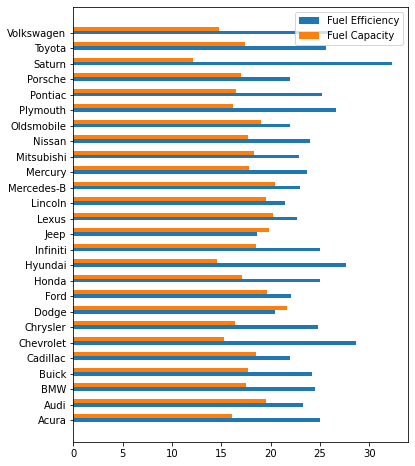

In [10]:
plt.figure(figsize=(6, 8))
plt.barh([x for x in np.arange(0,len(fe.index))],fe, height=0.25, tick_label=fe.index)
plt.barh([x+0.25 for x in np.arange(0,len(fe.index))],fc, height=0.25)
plt.legend(['Fuel Efficiency', 'Fuel Capacity'])
plt.show()

### 5. Import the supermarket_sales.csv and simple bar chart average gross income of all cities.

In [11]:
df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


<BarContainer object of 3 artists>

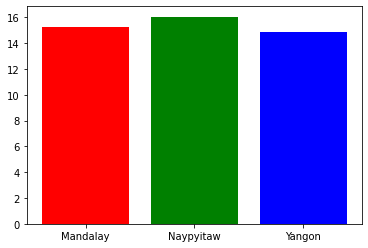

In [12]:
result = df.groupby('City')['gross income'].mean()
plt.bar(result.index, result.values, color=['r','g','b'])

### 6. Create a histogram for Total purchase

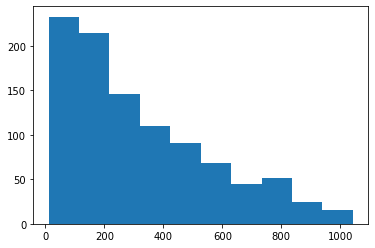

In [13]:
plt.hist(df['Total'])
plt.show()

### 7. Create a pie chart for payment to represent which mode of payment is used most.

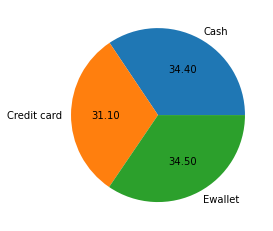

In [14]:
result = df.groupby(['Payment'])['Payment'].count()
plt.pie(result, autopct="%0.2f",labels=result.index)
plt.show()

In [15]:
df.groupby(['Payment'])['Payment'].count()

Payment
Cash           344
Credit card    311
Ewallet        345
Name: Payment, dtype: int64

### 8. Group by Product Line and create a horizontal bar chart to represent mean total purchase in particular Product line.

In [16]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


<BarContainer object of 6 artists>

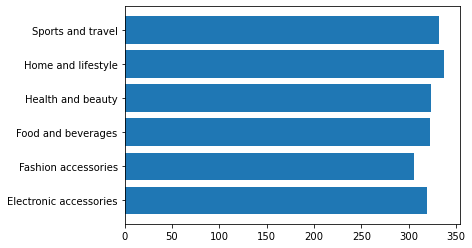

In [17]:
result = df.groupby('Product line')['Total'].mean()
plt.barh(result.index, result.values)

# 9. Label X and Y axes alongwith Title of the graph and save it as 'graph.png'.

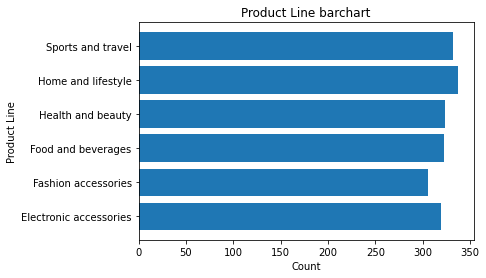

<Figure size 432x288 with 0 Axes>

In [18]:
result = df.groupby('Product line')['Total'].mean()
plt.barh(result.index, result.values)
plt.xlabel('Count')
plt.ylabel('Product Line')
plt.title('Product Line barchart')
plt.show()
plt.savefig('graph.png')

### 10. Create a line plot to represent the following
    equations:
    y=cos(x)+2
    y=log(x)
    y=sin(x)

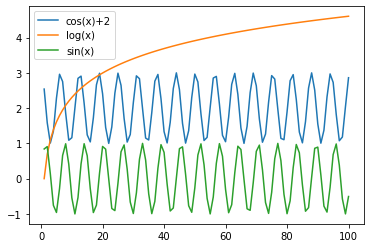

In [19]:
x = np.arange(1,101)
plt.plot(x, np.cos(x)+2)
plt.plot(x, np.log(x))
plt.plot(x, np.sin(x))
plt.legend(['cos(x)+2', 'log(x)', 'sin(x)'])
plt.show()

### 11. Add labels and title to the graph alongwith use different line styles.

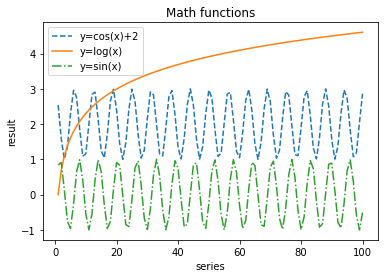

In [20]:
x = np.arange(1,101)
plt.plot(x, np.cos(x)+2,'--')
plt.plot(x, np.log(x),'-')
plt.plot(x, np.sin(x),'-.')
plt.legend(['y=cos(x)+2', 'y=log(x)', 'y=sin(x)'])
plt.xlabel('series')
plt.ylabel('result')
plt.title('Math functions')
plt.show()

### 13. Import the dataset Mall_customers.csv and plot a histogram on Spending Score with 10 bins.

In [21]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


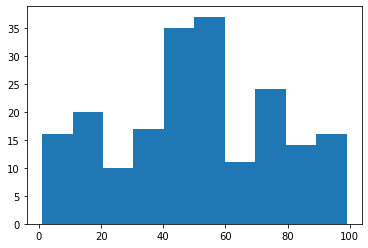

In [22]:
plt.hist(df['Spending Score (1-100)'],bins=10)
plt.show()

### 14. Add labels and title alongwith the proper xticks. What does the histogram tell you?

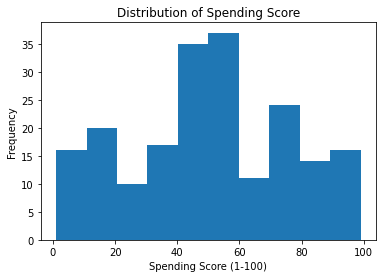

In [23]:
plt.hist(df['Spending Score (1-100)'],bins=10)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Distribution of Spending Score')
plt.show()


### 15. Sylphia has a dataset of various cereals sold in the
    supermarket. Syliphia wants to create a representation
    that can easily represents the qualities of cereals. Import the cereal dataset and plot ratings of different
    types of MFR.

In [24]:
df = pd.read_csv('cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


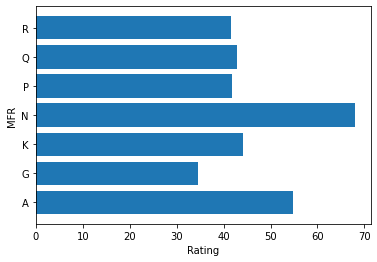

In [25]:
result = df.groupby('mfr')['rating'].mean()
plt.barh(result.index, result.values)
plt.ylabel('MFR')
plt.xlabel('Rating')
plt.show()

### 16. Use xticks range form 0-100 and change style of the graph to seaborn.

In [26]:
import seaborn as sns
import warnings 
warnings.filterwarnings(action='ignore')

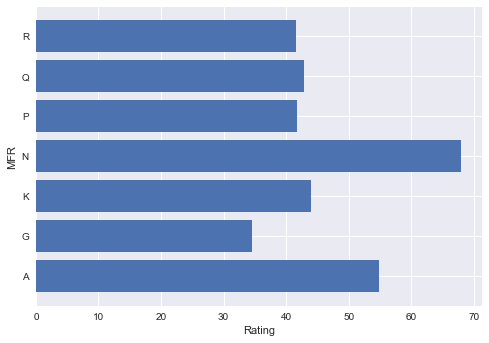

In [27]:
plt.style.use('seaborn')
plt.barh(result.index, result.values)
plt.xticks = np.arange(0,101,10)
plt.ylabel('MFR')
plt.xlabel('Rating')
plt.show()

### 17. Fill the missin values with mode if data is categorical else with mean and using subplots line plot.
    [calories, sodium, potass,rating]

In [28]:
df.isna().any()

name        False
mfr         False
type        False
calories    False
protein     False
fat         False
sodium      False
fiber       False
carbo       False
sugars      False
potass      False
vitamins    False
shelf       False
weight      False
cups        False
rating      False
dtype: bool

In [29]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col].fillna(df[col].mean())
    else:
        df[col].fillna(df[col].mode())

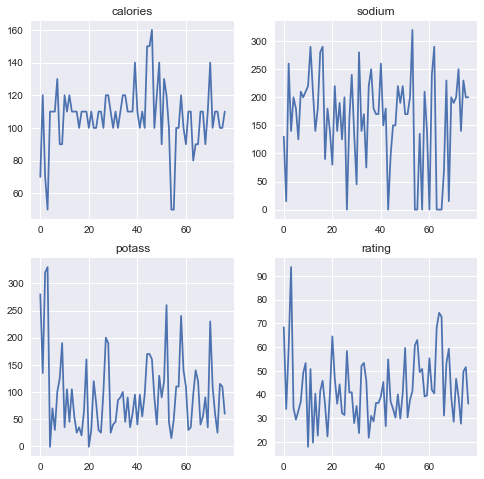

In [30]:
plt.figure(figsize=(8,8))
index = 1
for col in ['calories', 'sodium', 'potass','rating']:
    plt.subplot(2,2,index)
    plt.plot(df[col],)
    plt.title(col)
    index += 1
plt.show()